In [1]:
import linkpred
from linkpred.evaluation import Pair
import networkx as nx
import random
import itertools
from operator import itemgetter
import pickle
import matplotlib.pyplot as plt

In [2]:
path = "../DataSet FFF/"

In [3]:
path_graph = "../DataSet FFF/Graph_data/"

In [4]:
saved_path = "../DataSet FFF/LinkPrediction_task/1057/"

In [5]:
G = nx.read_graphml(path_graph+"Real_Network.graphml")

In [6]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 10361\nNumber of edges: 63960\nAverage degree:  12.3463'

# 1) Set preparation

In [7]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key = itemgetter(1), reverse = True)

In [8]:
sample_nodes = []
for i in sorted_degree:
    if i[1] > 30:
        sample_nodes.append(i[0])
print(len(sample_nodes))

511


In [9]:
new_graph = G.subgraph(sample_nodes)

print(len(new_graph.nodes()))
print(len(new_graph.edges()))

training_edge_len = len(new_graph.edges()) - int(len(new_graph.edges())/100 * 20)
test_edge_len = len(new_graph.edges()) - training_edge_len

511
10458


In [10]:
print(training_edge_len)
print(test_edge_len)

8367
2091


In [11]:
training_edges = random.sample(new_graph.edges, training_edge_len)

In [12]:
training_edges

[('neustartklima', 'howdareyou'),
 ('uprootthesystem', 'climate'),
 ('btw21', 'klimawahl'),
 ('actnow', 'snow'),
 ('climatetwitter', 'climatebrawl'),
 ('energy', 'greennewdeal'),
 ('keingradweiter', 'fff'),
 ('marchaporelclima', 'emergenciaclimatica27s'),
 ('endcoal', 'wind'),
 ('world', 'uprootthesystem'),
 ('klimastreik', 'langstreckenluisa'),
 ('carbon', 'energy'),
 ('sdgs', 'tesla'),
 ('klimatstrejk', 'chef'),
 ('cop25', 'madrid'),
 ('coronavirus', 'climatejustice'),
 ('nrw', 'klimawahl'),
 ('fridaysforfuture', 'globalclimatestrikes'),
 ('fridayfeeling', 'globalclimatestrike'),
 ('berlin', 'uprootthesystem'),
 ('gretathunberg', 'extinctionrebellion'),
 ('gretathunberg', 'linke'),
 ('hochwasser', 'fridaysforfuture'),
 ('elxn43', 'climateaction'),
 ('klimakrise', 'zukunft'),
 ('climateactionnow', 'greenrecovery'),
 ('klima', 'glasgow'),
 ('climatecrisis', 'stopeacop'),
 ('fridays', 'uprootthesystem'),
 ('気候危機', 'renewableenergy'),
 ('environnement', 'climatecrisis'),
 ('nature', 'bio

2) Create training and test set

In [13]:
training = new_graph.edge_subgraph(training_edges)

In [14]:
print(nx.info(training))

Name: 
Type: Graph
Number of nodes: 511
Number of edges: 8367
Average degree:  32.7476


In [15]:
test = new_graph.copy()
test.remove_edges_from(training.edges())

In [16]:
print(nx.info(test))

Name: 
Type: Graph
Number of nodes: 511
Number of edges: 2091
Average degree:   8.1840


4) Create node set

In [17]:
nodes = list(new_graph.nodes())
nodes.extend(list(test.nodes()))

5) Compute pair test set and universe set

In [18]:
test = [Pair(i) for i in test.edges()]
universe = set([Pair(i) for i in itertools.product(nodes, nodes) if i[0]!=i[1]])

In [19]:
print(len(universe))

130305


6) Storage file

In [20]:
universe

{Pair('renewableenergy', 'climatestrikes'),
 Pair('renewableenergy', 'comics'),
 Pair('stopcambo', 'merz'),
 Pair('europa', 'cop26'),
 Pair('electric', 'covid'),
 Pair('leavenoonebehind', 'goodmorningeveryone'),
 Pair('nyc', 'earth'),
 Pair('electricity', 'climateaction'),
 Pair('glasgow', 'davos2020'),
 Pair('scientistsforfuture', 'design'),
 Pair('klimahysterie', 'climate'),
 Pair('peace', 'future'),
 Pair('greenpeace', 'fridaysforhubraum'),
 Pair('tesla', 'fighteverycrisis'),
 Pair('zdf', 'huelgamundialporelclima'),
 Pair('klimakatastrophe', 'habeck'),
 Pair('schoolstrike4climate', 'basilicata'),
 Pair('scioperoperilclima', 'bundestagswahl'),
 Pair('technology', 'goodmorning'),
 Pair('friyay', 'antifa'),
 Pair('schoolstrike4climate', '1jahrnurblockiert'),
 Pair('extinction', 'bundesregierung'),
 Pair('neustartklima', 'cleanenergy'),
 Pair('fridaythoughts', 'europa'),
 Pair('eni', 'china'),
 Pair('klimapaket', 'germany'),
 Pair('chile', 'antisemitismus'),
 Pair('気候危機', 'klimaatstakin

In [21]:
with open(saved_path+'universe_1057.pickle', 'wb') as f:
    pickle.dump(universe, f)
with open(saved_path+'test_1057.pickle', 'wb') as f:
    pickle.dump(test, f) 
nx.write_graphml(training, saved_path+"training_1057.graphml")

# 2) Prediction

1) Read data

In [22]:
with open(saved_path+'universe_1057.pickle', 'rb') as f:
    universe = pickle.load(f)
with open(saved_path+'test_1057.pickle', 'rb') as f:
    test = pickle.load(f)
training = nx.read_graphml(saved_path+"training_1057.graphml")

2) Predictions

In [23]:
cn = linkpred.predictors.CommonNeighbours(training, excluded=training.edges())
cn_results = cn.predict()

In [24]:
aa = linkpred.predictors.AdamicAdar(training, excluded=training.edges())
aa_results = aa.predict()

In [25]:
jc = linkpred.predictors.Jaccard(training, excluded=training.edges())
jc_results = jc.predict()

In [26]:
kz = linkpred.predictors.Katz(training, excluded=training.edges())
kz_results = kz.predict()

Computing matrix powers: [############################################################] 5/5


In [27]:
simrank = linkpred.predictors.SimRank(training, excluded=training.edges())
simrank_results = simrank.predict()

3) Saved predictions

In [28]:
res = []
for i, j in zip(cn_results, cn_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'cn_results_1057.pickle', 'wb') as f:
    pickle.dump(res, f)

In [29]:
res = []
for i, j in zip(aa_results, aa_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'aa_results_1057.pickle', 'wb') as f:
    pickle.dump(res, f)

In [30]:
res = []
for i, j in zip(jc_results, jc_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'jc_results_1057.pickle', 'wb') as f:
    pickle.dump(res, f)

In [31]:
res = []
for i, j in zip(kz_results, kz_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'kz_results_1057.pickle', 'wb') as f:
    pickle.dump(res, f)

In [32]:
res = []
for i, j in zip(simrank_results, simrank_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'simrank_results_1057.pickle', 'wb') as f:
    pickle.dump(res, f)

3) Evaluation

In [33]:
cn_evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test, universe)

In [34]:
with open(saved_path+'cn_evaluation_1057.pickle', 'wb') as f:
    pickle.dump(cn_evaluation, f) 

In [35]:
aa_evaluation = linkpred.evaluation.EvaluationSheet(aa_results, test, universe)

In [36]:
with open(saved_path+'aa_evaluation_1057.pickle', 'wb') as f:
    pickle.dump(aa_evaluation, f) 

In [37]:
jc_evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test, universe)

In [38]:
with open(saved_path+'jc_evaluation_1057.pickle', 'wb') as f:
    pickle.dump(jc_evaluation, f) 

In [39]:
kz_evaluation = linkpred.evaluation.EvaluationSheet(kz_results, test, universe)

In [40]:
with open(saved_path+'kz_evaluation_1057.pickle', 'wb') as f:
    pickle.dump(kz_evaluation, f) 

In [41]:
simrank_evaluation = linkpred.evaluation.EvaluationSheet(simrank_results, test, universe)

In [42]:
with open(saved_path+'simrank_evaluation_1057.pickle', 'wb') as f:
    pickle.dump(simrank_evaluation, f) 

# 3) Result Analysis

In [44]:
with open(saved_path+'aa_evaluation_1057.pickle', 'rb') as f:
    aa_evaluation = pickle.load(f)
with open(saved_path+'aa_results_1057.pickle', 'rb') as f:
    aa_results = pickle.load(f)
    
with open(saved_path+'cn_evaluation_1057.pickle', 'rb') as f:
    cn_evaluation = pickle.load(f)
with open(saved_path+'cn_results_1057.pickle', 'rb') as f:
    cn_results = pickle.load(f)

with open(saved_path+'jc_evaluation_1057.pickle', 'rb') as f:
    jc_evaluation = pickle.load(f)
with open(saved_path+'jc_results_1057.pickle', 'rb') as f:
    jc_results = pickle.load(f)

with open(saved_path+'kz_evaluation_1057.pickle', 'rb') as f:
    kz_evaluation = pickle.load(f)
with open(saved_path+'kz_results_1057.pickle', 'rb') as f:
    kz_results = pickle.load(f)

with open(saved_path+'simrank_evaluation_1057.pickle', 'rb') as f:
    sm_evaluation = pickle.load(f)
with open(saved_path+'simrank_results_1057.pickle', 'rb') as f:
    sm_results = pickle.load(f)

In [45]:
def print_res(res):
    res=sorted(res,key=lambda x: x[1],reverse=True)
    for i in res[:10]:
        print(i)

In [46]:
print_res(aa_results)
print("")
print("")
print("")
print_res(cn_results)
print("")
print("")
print("")
print_res(jc_results)
print("")
print("")
print("")
print_res(kz_results)
print("")
print("")
print("")
print_res(sm_results)

[Pair('fridaysforfuture', 'climatestrike'), 69.38129344490488]
[Pair('fridaysforfuture', 'fridayforfuture'), 49.573869126347]
[Pair('climatestrike', 'climateaction'), 46.699336897649104]
[Pair('climatecrisis', 'climateaction'), 46.286785551010624]
[Pair('klimaschutz', 'fridaysforfuture'), 36.67196266845856]
[Pair('fridaysforfuture', 'fff'), 35.7681167513075]
[Pair('fridaysforfuture', 'climatejustice'), 34.567726901844644]
[Pair('climatestrikeonline', 'climatestrike'), 30.915808037208002]
[Pair('climateactionnow', 'climateaction'), 28.898817552140518]
[Pair('schoolstrike4climate', 'fridaysforfuture'), 27.949750079961618]



[Pair('fridaysforfuture', 'climatestrike'), 220.0]
[Pair('fridaysforfuture', 'fridayforfuture'), 162.0]
[Pair('climatecrisis', 'climateaction'), 159.0]
[Pair('climatestrike', 'climateaction'), 157.0]
[Pair('klimaschutz', 'fridaysforfuture'), 120.0]
[Pair('fridaysforfuture', 'fff'), 119.0]
[Pair('fridaysforfuture', 'climatejustice'), 119.0]
[Pair('climatestrikeonline'

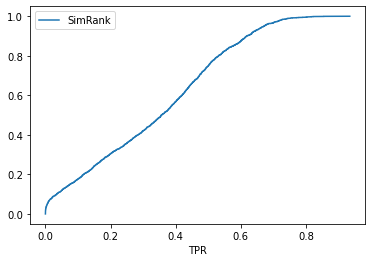

In [47]:
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")

plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

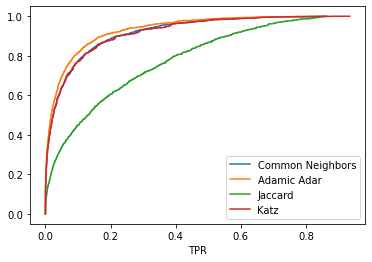

In [48]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

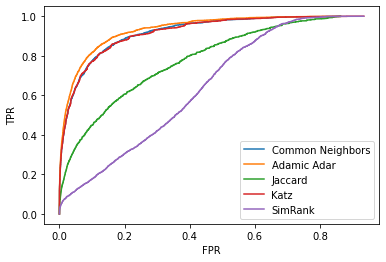

In [49]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")


plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

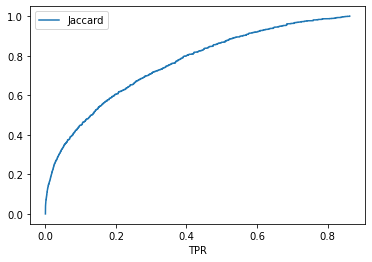

In [50]:
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

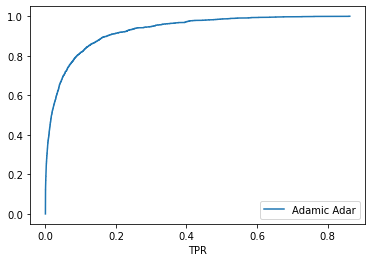

In [51]:
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

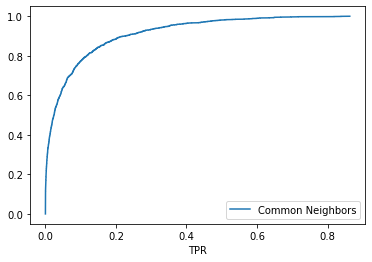

In [52]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

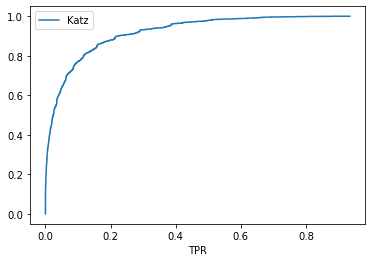

In [53]:
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

In [54]:
sm_evaluation.data 

array([[1.00000e+00, 0.00000e+00, 2.09000e+03, 1.28214e+05],
       [2.00000e+00, 0.00000e+00, 2.08900e+03, 1.28214e+05],
       [3.00000e+00, 0.00000e+00, 2.08800e+03, 1.28214e+05],
       ...,
       [2.09100e+03, 1.19845e+05, 0.00000e+00, 8.36900e+03],
       [2.09100e+03, 1.19846e+05, 0.00000e+00, 8.36800e+03],
       [2.09100e+03, 1.19847e+05, 0.00000e+00, 8.36700e+03]])

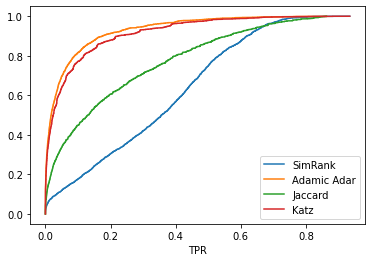

In [55]:
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

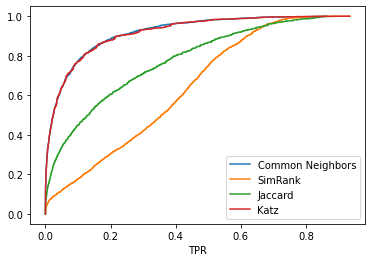

In [56]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import auc

print("Area Under Roc Curve (AUROC)")
print(f"Common Neigh.: \t {auc(cn_evaluation.fallout(), cn_evaluation.recall())}")
print(f"Adamic Adar: \t {auc(aa_evaluation.fallout(), aa_evaluation.recall())}")
print(f"Jaccard: \t {auc(jc_evaluation.fallout(), jc_evaluation.recall())}")
print(f"SimRank: \t {auc(sm_evaluation.fallout(), sm_evaluation.recall())}")
print(f"Katz:\t \t {auc(kz_evaluation.fallout(), kz_evaluation.recall())}")

Area Under Roc Curve (AUROC)
Common Neigh.: 	 0.7870108765804827
Adamic Adar: 	 0.8006611517805781
Jaccard: 	 0.6534798793358221
SimRank: 	 0.5948169345074433
Katz:	 	 0.8573429590982204


In [58]:
preds = list(nx.preferential_attachment(training,universe))
pref_results=[]
for u, v, p in preds:
    #print('(%s, %s) -> %d' % (u, v, p))
    pref_results.append([u,v,p])
pref_results=sorted(pref_results,key=lambda x: x[2],reverse=True)
pref_results

[['fridaysforfuture', 'climatestrike', 114124],
 ['fridaysforfuture', 'climatecrisis', 97232],
 ['fridaysforfuture', 'climatechange', 95172],
 ['fridaysforfuture', 'climateaction', 95172],
 ['fridaysforfuture', 'climateemergency', 84872],
 ['fridaysforfuture', 'fridayforfuture', 81576],
 ['gretathunberg', 'fridaysforfuture', 66332],
 ['climatestrike', 'climatecrisis', 65372],
 ['fridaysforfuture', 'climate', 65096],
 ['climatestrike', 'climatechange', 63987],
 ['climatestrike', 'climateaction', 63987],
 ['klimastreik', 'fridaysforfuture', 62212],
 ['fridaysforfuture', 'extinctionrebellion', 61800],
 ['klimaschutz', 'fridaysforfuture', 60976],
 ['fridaysforfuture', 'fff', 59740],
 ['fridaysforfuture', 'climateactionnow', 59740],
 ['klimakrise', 'fridaysforfuture', 59328],
 ['fridaysforfuture', 'climatestrikeonline', 58092],
 ['fridaysforfuture', 'climatejustice', 57268],
 ['climatestrike', 'climateemergency', 57062],
 ['fridayforfuture', 'climatestrike', 54846],
 ['climatecrisis', 'clim

In [59]:
def intersect(result_1, result_2, dim, name):
    print(f"{name}")
    int_1_2=[]
    count=0
    for item_1 in result_1[:300]:
        for item_2 in result_2[:300]:
            if item_1[0]==item_2[0]:
                print('intersezione:',item_1[0])
                int_1_2.append(item_1[0])
                count+=1
    print(count)
    return int_1_2

In [60]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [61]:
aa_cn = intersect(aa_results, cn_results, 300, "AA vs CN")
aa_jc = intersect(aa_results, jc_results, 300, "AA vs JC")
aa_kz = intersect(aa_results, kz_results, 300, "AA vs KZ")
aa_sm = intersect(aa_results, sm_results, 300, "AA vs SM")


AA vs CN
intersezione: weekend - photography
intersezione: photography - klimakrise
intersezione: photography - keingradweiter
intersezione: photography - europa
intersezione: photography - peace
intersezione: photography - arctic
intersezione: photography - fashionweek
intersezione: plasticfree - photography
intersezione: youth - photography
intersezione: tantacazz - photography
intersezione: scientists4future - photography
intersezione: photography - notmyklimapaket
intersezione: photography - comics
intersezione: photography - energytransition
intersezione: zukunft - photography
intersezione: photography - fridays
intersezione: politik - photography
intersezione: photography - blog
intersezione: photography - diesel
intersezione: sdgs - photography
intersezione: withdrawthecap - photography
intersezione: photography - landwirtschaft
intersezione: photography - eni
intersezione: photography - noforestnofuture
intersezione: photography - cdu
intersezione: polizei - photography
interse

intersezione: photography - australiafires
intersezione: photography - ilmasto
intersezione: photography - baerbock
intersezione: photography - italiaviva
intersezione: photography - cop25
intersezione: spd - photography
intersezione: wirtschaft - photography
intersezione: photography - klimanotstand
intersezione: photography - ohnemeinenphysiotherapeuten
intersezione: renzi - photography
intersezione: photography - ilmastolakko
intersezione: 気候危機対策に菜食を - photography
intersezione: photography - klimaneutralität
intersezione: photography - datteln4
intersezione: stuttgart - photography
intersezione: photography - bangladesh
intersezione: stopadani - photography
intersezione: uk - photography
intersezione: photography - dannibleibt
intersezione: photography - codered
intersezione: photography - bonn
intersezione: photography - corona
intersezione: photography - luisaneubauer
intersezione: photography - nopegida
intersezione: photography - environmentaljustice
intersezione: photography - 

In [62]:
cn_jc = intersect(cn_results, jc_results, 300, "CN vs JC")
cn_kz = intersect(cn_results, kz_results, 300, "CN vs KZ")
cn_sm = intersect(cn_results, sm_results, 300, "CN vs SM")

CN vs JC
intersezione: weekend - photography
intersezione: photography - klimakrise
intersezione: photography - keingradweiter
intersezione: photography - europa
intersezione: photography - peace
intersezione: photography - arctic
intersezione: photography - fashionweek
intersezione: plasticfree - photography
intersezione: youth - photography
intersezione: tantacazz - photography
intersezione: scientists4future - photography
intersezione: photography - notmyklimapaket
intersezione: photography - comics
intersezione: photography - energytransition
intersezione: zukunft - photography
intersezione: photography - fridays
intersezione: politik - photography
intersezione: photography - blog
intersezione: photography - diesel
intersezione: sdgs - photography
intersezione: withdrawthecap - photography
intersezione: photography - landwirtschaft
intersezione: photography - eni
intersezione: photography - noforestnofuture
intersezione: photography - cdu
intersezione: polizei - photography
interse

intersezione: photography - hongkong
intersezione: photography - gretathurnberg
intersezione: youthstrike4climate - photography
intersezione: photography - oil
intersezione: photography - klimaschutzgesetz
intersezione: strike4climate - photography
intersezione: photography - climatecrisis
intersezione: photography - merkel
intersezione: saturdayvibes - photography
intersezione: photography - hambacherforst
intersezione: sudbury - photography
intersezione: photography - life
intersezione: photography - emergenciaclimatica27s
intersezione: photography - mapa
intersezione: photography - floods
intersezione: photography - fridaymorning
intersezione: photography - amazon
intersezione: thursday - photography
intersezione: photography - globalstrike
intersezione: schoolstrike - photography
intersezione: photography - animalrights
intersezione: photography - justtransition
intersezione: photography - elxn43
intersezione: photography - humanchangenotclimatechange
intersezione: photography - gl

In [63]:
jc_kz = intersect(jc_results, kz_results, 300, "JC vs KZ")
jc_sm = intersect(jc_results, sm_results, 300, "JC vs SM")

JC vs KZ
intersezione: withdrawthecap - photography
intersezione: photography - landwirtschaft
intersezione: photography - eni
intersezione: photography - noforestnofuture
intersezione: photography - cdu
intersezione: polizei - photography
intersezione: photography - actonsahel
intersezione: photography - government
intersezione: stopcambo - photography
intersezione: torino - photography
intersezione: sustainable - photography
intersezione: zerowaste - photography
intersezione: unitebehindthescience - photography
intersezione: pollutersout - photography
intersezione: photography - münster
intersezione: photography - covid
intersezione: photography - gretathumberg
intersezione: strikewithus - photography
intersezione: photography - coal
intersezione: photography - fundourfuturenotgas
intersezione: photography - parisagreement
intersezione: verkehrswende - photography
intersezione: shell - photography
intersezione: photography - electric
intersezione: photography - facetheclimateemergenc

intersezione: photography - greta
intersezione: streatweare - photography
intersezione: scioperoperilclima - photography
intersezione: photography - animals
intersezione: photography - onu
intersezione: photography - hamburg
intersezione: photography - nyc
intersezione: photography - canada
intersezione: youthforclimate - photography
intersezione: photography - ilmastonmuutos
intersezione: umwelt - photography
intersezione: photography - foodies
intersezione: wildlife - photography
intersezione: photography - climateactionnow
intersezione: photography - justice
intersezione: photography - 27settembre
intersezione: sustainability - photography
intersezione: photography - oceans
intersezione: photography - klimakonferenz
intersezione: photography - klimawahl
intersezione: photography - glasgow
intersezione: photography - antifa
intersezione: photography - allefürsklima
intersezione: photography - habeck
269


In [64]:
kz_sm = intersect(kz_results, sm_results, 300, "KZ vs SM")

KZ vs SM
intersezione: photography - klimakonferenz
intersezione: thursday - photography
intersezione: photography - facetheclimateemergency
intersezione: photography - london
intersezione: photography - australia
intersezione: photography - habeck
intersezione: photography - allefürsklima
intersezione: photography - antifa
intersezione: photography - glasgow
intersezione: photography - klimawahl
intersezione: photography - oceans
intersezione: photography - 27settembre
intersezione: wildlife - photography
intersezione: umwelt - photography
intersezione: photography - ilmastonmuutos
intersezione: youthforclimate - photography
intersezione: photography - canada
intersezione: photography - hamburg
intersezione: photography - onu
intersezione: scioperoperilclima - photography
intersezione: photography - klimat
intersezione: photography - fridaysforhubraum
intersezione: up - photography
intersezione: photography - climatestrikes
intersezione: photography - climateactivist
intersezione: pho

In [65]:
# All intersection
int_m=intersection(cn_jc,kz_sm)
int_final=intersection(int_m,aa_sm)

In [66]:
len(int_final)

175

In [67]:
int_final

[Pair('withdrawthecap', 'photography'),
 Pair('photography', 'landwirtschaft'),
 Pair('photography', 'eni'),
 Pair('photography', 'noforestnofuture'),
 Pair('photography', 'cdu'),
 Pair('polizei', 'photography'),
 Pair('photography', 'actonsahel'),
 Pair('photography', 'government'),
 Pair('stopcambo', 'photography'),
 Pair('torino', 'photography'),
 Pair('sustainable', 'photography'),
 Pair('zerowaste', 'photography'),
 Pair('unitebehindthescience', 'photography'),
 Pair('pollutersout', 'photography'),
 Pair('photography', 'münster'),
 Pair('photography', 'covid'),
 Pair('photography', 'gretathumberg'),
 Pair('strikewithus', 'photography'),
 Pair('photography', 'coal'),
 Pair('photography', 'fundourfuturenotgas'),
 Pair('photography', 'parisagreement'),
 Pair('verkehrswende', 'photography'),
 Pair('shell', 'photography'),
 Pair('photography', 'electric'),
 Pair('photography', 'facetheclimateemergency'),
 Pair('photography', 'co2preis'),
 Pair('photography', 'klimapaket'),
 Pair('photo